In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('health_data_cleaned.csv')

In [3]:
df.columns

Index(['SEX', 'AGE_GROUP', 'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE',
       'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD',
       'CREATININE', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD',
       'DRK_YN', 'CRS_YN'],
      dtype='object')

In [4]:
df.shape

(125592, 18)

In [5]:
X = df.drop('CRS_YN', axis=1)
y = df['CRS_YN']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [8]:
def model_paramter(model_range, parametre):
    train_results = []
    test_results = []
    with tqdm(total=len(model_range), desc='Training') as pbar:
        for i in model_range:
            if parametre == 'min_samples_split':
                model = RandomForestClassifier(n_jobs=-1, **{parametre: float(i)}, random_state=35)
            else:
                model = RandomForestClassifier(n_jobs=-1, **{parametre: int(i)}, random_state=35)
            model.fit(X_train, y_train)

            train_pred = model.predict_proba(X_train)[:, 1]

            fp, tp, _ = roc_curve(y_train, train_pred)
            roc_auc = auc(fp, tp)
            train_results.append(roc_auc)

            y_pred = model.predict_proba(X_test)[:, 1]

            fp, tp, _ = roc_curve(y_test, y_pred)
            roc_auc = auc(fp, tp)
            test_results.append(roc_auc)

            pbar.update(1)
    l1, = plt.plot(model_range, train_results, 'blue', label='Train AUC')
    l2, = plt.plot(model_range, test_results, 'red', label='Test AUC')
    plt.ylabel('AUC score')
    plt.xlabel(parametre)
    plt.legend()
    plt.show();

Training: 100%|████████████████████████████████████████████████████████████████████████| 20/20 [03:13<00:00,  9.68s/it]


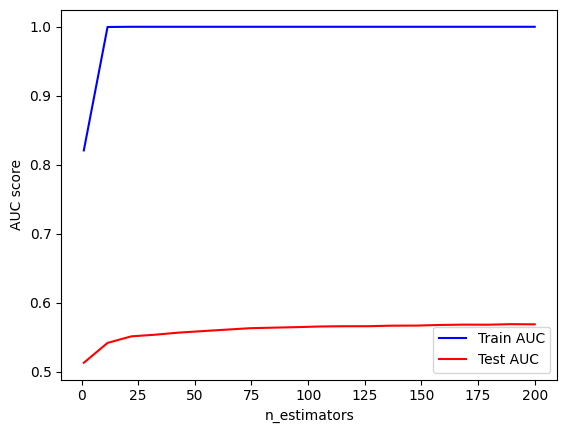

In [8]:
list = np.linspace(1, 200, 20, endpoint=True)
model_paramter(list, 'n_estimators')

Training: 100%|████████████████████████████████████████████████████████████████████████| 30/30 [03:29<00:00,  6.99s/it]


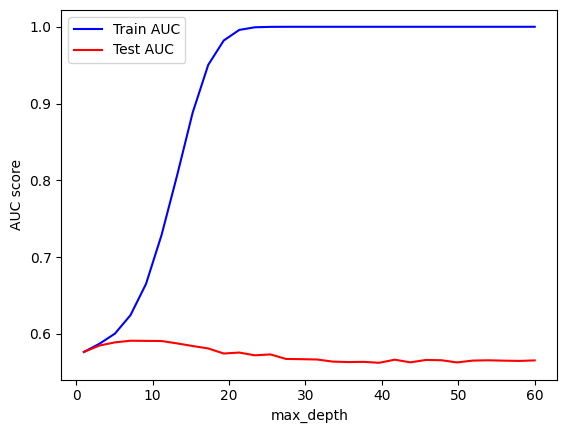

In [9]:
list = np.linspace(1, 60, 30, endpoint=True)
model_paramter(list, 'max_depth')

Training: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.08it/s]


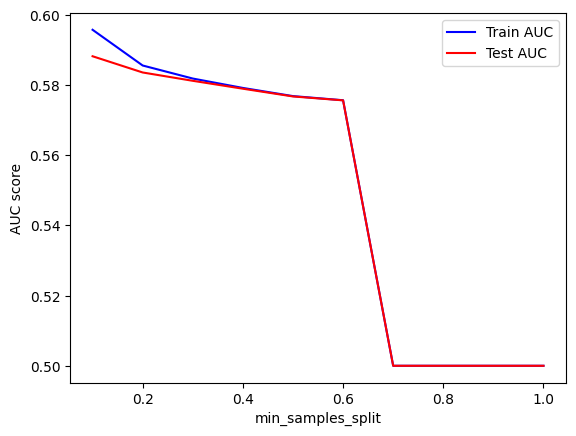

In [10]:
list = np.linspace(0.1, 1.0, 10, endpoint=True, dtype=float)
model_paramter(list, 'min_samples_split')

In [7]:
model = RandomForestClassifier(n_jobs=-1, n_estimators=200, max_depth=10, min_samples_split=0.1, random_state=35)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)

fp, tp, _ = roc_curve(y_train, train_pred)
roc_auc_train = auc(fp, tp)

y_pred = model.predict(X_test)

fp, tp, _ = roc_curve(y_test, y_pred)
roc_auc_test = auc(fp, tp)

print(f'Train AUC: {roc_auc_train}, Test AUC: {roc_auc_test}')

Train AUC: 0.5, Test AUC: 0.5


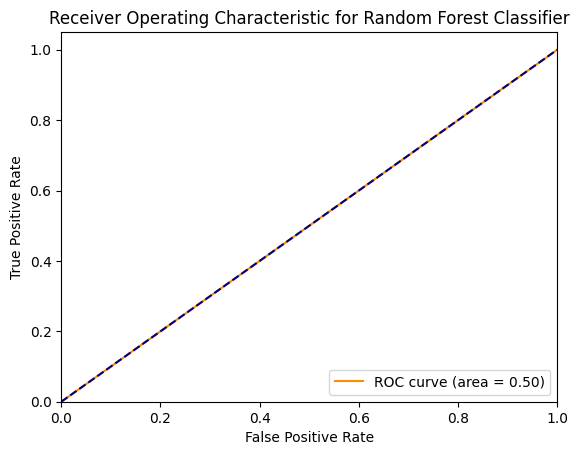

In [10]:
plt.figure()
plt.plot(fp, tp, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fp, tp))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()